In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import gammainc as gamma
from scipy.special import iv as I
from scipy.special import factorial
from scipy.signal import unit_impulse as delta
from scipy.stats import ncx2
marcumQ = ncx2.cdf
e = np.exp(1)

# calculate the pdf and look at what kappa does

In [3]:
kap = 0.01 # trapping
k1 = 0.1 # rest
k2 = 1.0 # motion
v = 1.0
    
def p(x,t,kap=kap,k1=k1,k2=k2,v=v,special=False):
    t = t.astype('float128')
    x = x.astype('float64')
    kp = k1+k2
    tmxv = t-x/v
    the = np.heaviside(tmxv,1)
    tmxv[tmxv<=0]=0.0
    a = e**(-(kap+k1)*tmxv-k2*x/v)
    b = 1/v*np.sqrt(k1*k2*x/v/tmxv)*the*I(1,2*np.sqrt(k1*k2*x/v*tmxv))
    c = k2/v*the*I(0,2*np.sqrt(k1*k2*x/v*tmxv))
    d = kap*k2/v/(kap+k1)*the*e**(-k2*x/v)

    def P1(x,y):
        # this is the sum over incomplete gamma functions
        n = 150 # number of terms to keep in Q
        j = np.arange(n).reshape(-1,1).astype('float64')    
        Q = x**j/factorial(j)*gamma(j+1,y)
        return np.nansum(Q,0)
    
    def P1py(x,y):
        # it can also be expressed as a marcum Q-function
        # which is equivalent to a non-central chi-squared cdf
        # this code block provides
        # e^{-x}*\sum_{n=0}^\infty \frac{x^n}{n!n!}\gamma(n+1,y)
        from scipy.stats import ncx2
        Q = ncx2.cdf
        return Q(y*2,df=2,nc=2*x)        
    return a*(b+c)+d*e**(k1*k2*x/v/(kap+k1))*P1py( k1*k2*x/v/(kap+k1), (kap+k1)*tmxv)

    

/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide
/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in multiply


0.0
0.9962525984091285
0.9976305463514838
0.997720450649813
0.9977263140397282
0.0
0.9979166902343739
0.999825475057405
0.9999853855436469
0.9999987766896051


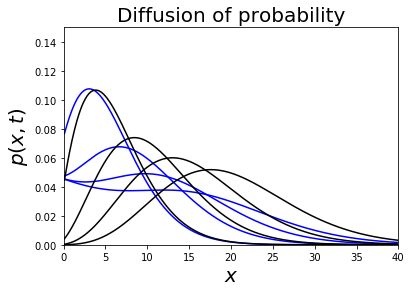

In [4]:
x = np.linspace(0,100,1000)
dx = x[1]-x[0]
t = np.linspace(0,100,5)
kap = 0.01 # trapping
k1 = 0.1 # rest
k2 = 1.0 # motion
v = 2.0
for tt in t:
    plt.plot(x,p(x,tt,kap=kap,k1=k1,k2=k2,v=v),color='blue')
    print(np.nansum(p(x,tt,kap=kap,k1=k1,k2=k2,v=v))*dx)
    
kap = 0.0 # trapping
k1 = 0.1 # rest
k2 = 1.0 # motion
v = 2.0
for tt in t:
    plt.plot(x,p(x,tt,kap=kap,k1=k1,k2=k2,v=v),color='black')
    print(np.nansum(p(x,tt,kap=kap,k1=k1,k2=k2,v=v))*dx)
    
plt.xlim(0,40)
plt.ylim(0,0.15)
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$p(x,t)$',fontsize=20)
plt.title('Diffusion of probability',fontsize=20)
plt.savefig('trapping-pdf.png', bbox_inches='tight')


# calculate the mean

In [64]:
def mean(t,k1,k2,kap,v):
    sinh=np.sinh
    cosh=np.cosh
    exp=np.exp
    sqrt = np.sqrt
    
    kp = k1+k2
    a = (kap+kp)/2.0
    b = sqrt(a**2-kap*k2)
    print(b)
    t = np.float128(t)
    out = 1/b*exp(-a*t)*sinh(b*t)
    out += (kap+k1)/(2*b)*(1/(b-a)*(exp((b-a)*t)-1)+1/(a+b)*(exp(-(a+b)*t)-1))
    return v*out

51.45291536929661


/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in sinh
/home/kpierce/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply


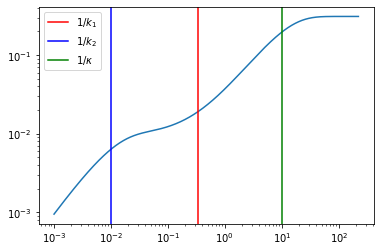

In [103]:
t = np.geomspace(1e-3,1e5,50000)
k1 = 3.0 # inverse rest time
k2 = 100.0 # inverse motion time
kap = 0.1
v=1.0
plt.loglog(t,mean(t,k1,k2,kap,v))
plt.axvline(1/k1,label=r'$1/k_1$',color='red')
plt.axvline(1/k2,label=r'$1/k_2$',color='blue')
plt.axvline(1/kap,label=r'$1/\kappa$',color='green')
plt.legend()

In [24]:
t

array([1.00000000e-04, 1.01861017e-04, 1.03756668e-04, 1.05687597e-04,
       1.07654461e-04, 1.09657929e-04, 1.11698682e-04, 1.13777413e-04,
       1.15894830e-04, 1.18051653e-04, 1.20248614e-04, 1.22486461e-04,
       1.24765955e-04, 1.27087871e-04, 1.29452998e-04, 1.31862140e-04,
       1.34316117e-04, 1.36815763e-04, 1.39361927e-04, 1.41955477e-04,
       1.44597292e-04, 1.47288272e-04, 1.50029332e-04, 1.52821404e-04,
       1.55665436e-04, 1.58562396e-04, 1.61513269e-04, 1.64519059e-04,
       1.67580786e-04, 1.70699493e-04, 1.73876240e-04, 1.77112106e-04,
       1.80408193e-04, 1.83765620e-04, 1.87185529e-04, 1.90669084e-04,
       1.94217468e-04, 1.97831888e-04, 2.01513573e-04, 2.05263775e-04,
       2.09083769e-04, 2.12974854e-04, 2.16938352e-04, 2.20975611e-04,
       2.25088005e-04, 2.29276931e-04, 2.33543814e-04, 2.37890104e-04,
       2.42317279e-04, 2.46826845e-04, 2.51420335e-04, 2.56099310e-04,
       2.60865362e-04, 2.65720111e-04, 2.70665207e-04, 2.75702333e-04,
      